In [2]:
# ===== BLOQUE 1: Parámetros + contorno (CCW) =====
println("BLOQUE 1")

# Parámetros (Schneider)
R  = 0.25          # m (radio del rodillo)
W  = 1.345         # m (ancho total de la lámina)
W2 = W/2           # m (eje de simetría)
H  = 2R            # m (altura del dominio de estudio)

# Densidades de puntos (ajustables)
n_arc = 200        # puntos en el arco
n_lin = 160        # puntos por cada recta

# Arco: cuadrante superior derecho del rodillo IZQUIERDO
# Centro (0,R), y positiva hacia ABAJO en nuestra convención de visualización,
# pero geométricamente se define igual: θ ∈ [-π/2, 0], (0,0) -> (R,R)
theta = range(-pi/2, 0, length=n_arc)
x_arc = [R * cos(t)          for t in theta]
y_arc = [R + R * sin(t)      for t in theta]

# Rectas del contorno (todas en sentido CCW)
# 1) Vertical x = R: (R,R) -> (R,2R)
x_vR = fill(R, n_lin)
y_vR = range(R, stop=2R, length=n_lin)

# 2) Inferior y = 2R: (R,2R) -> (W/2,2R)
x_bot = range(R, stop=W2, length=n_lin)
y_bot = fill(2R, n_lin)

# 3) Simetría x = W/2: (W/2,2R) -> (W/2,0)
x_sym = fill(W2, n_lin)
y_sym = range(2R, stop=0.0, length=n_lin)

# 4) Superior y = 0: (W/2,0) -> (0,0)
x_top = range(W2, stop=0.0, length=n_lin)
y_top = fill(0.0, n_lin)

# Ensamble del polígono (CCW)
x_dom = vcat(x_arc, x_vR, x_bot, x_sym, x_top)
y_dom = vcat(y_arc, y_vR, y_bot, y_sym, y_top)

# Chequeos rápidos
println("✅ BLOQUE 1 FUNCIONA")
println("  N puntos total = ", length(x_dom))
println("  P_inicial (esperado ~ (0,0)):   (", round(x_dom[1],digits=6),  ", ", round(y_dom[1],digits=6),  ")")
println("  Fin arco (esperado ~ (R,R)):    (", round(x_arc[end],digits=6), ", ", round(y_arc[end],digits=6), ")")
println("  Fin vert (esperado ~ (R,2R)):   (", round(x_vR[end],digits=6),  ", ", round(y_vR[end],digits=6),  ")")
println("  Punto (W/2,0) (cierre sup):     (", round(x_top[end],digits=6),  ", ", round(y_top[end],digits=6),  ")")


BLOQUE 1
✅ BLOQUE 1 FUNCIONA
  N puntos total = 840
  P_inicial (esperado ~ (0,0)):   (0.0, 0.0)
  Fin arco (esperado ~ (R,R)):    (0.25, 0.25)
  Fin vert (esperado ~ (R,2R)):   (0.25, 0.5)
  Punto (W/2,0) (cierre sup):     (0.0, 0.0)


BLOQUE 2 (visual)


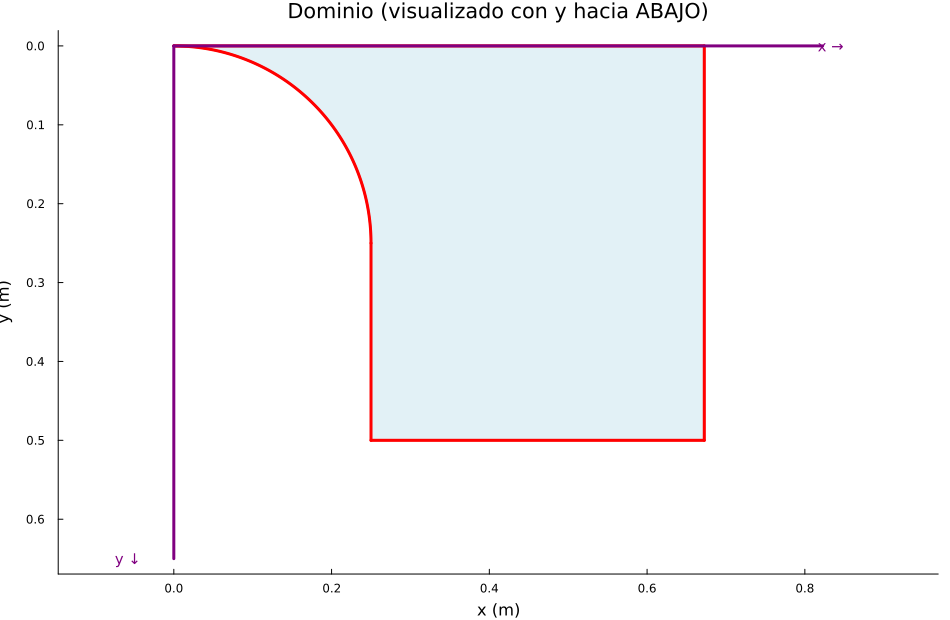

✅ BLOQUE 2 FUNCIONA (visual listo)


In [3]:
# ===== BLOQUE 2: Visualización =====
println("BLOQUE 2 (visual)")

using Plots
gr()

p = plot(size=(950,620))

# Relleno del dominio
plot!(p, x_dom, y_dom,
      seriestype=:shape, fillalpha=0.35, fillcolor=:lightblue,
      linecolor=:red, lw=2, label="")

# Fronteras resaltadas (rojo)
plot!(p, x_arc, y_arc, lw=3, color=:red, label="")     # arco
plot!(p, x_vR,  y_vR,  lw=3, color=:red, label="")     # x = R
plot!(p, x_bot, y_bot, lw=3, color=:red, label="")     # y = 2R
plot!(p, x_sym, y_sym, lw=3, color=:red, label="")     # x = W/2
plot!(p, x_top, y_top, lw=3, color=:red, label="")     # y = 0

# Ejes morados de referencia (como en tu esquema)
plot!(p, [0, W2+0.15], [0, 0], color=:purple, lw=3, label="")
annotate!(p, [(W2+0.16, 0.0, text("x →", :purple, 10))])
plot!(p, [0, 0], [0, 2R+0.15], color=:purple, lw=3, label="")
annotate!(p, [(-0.06, 2R+0.15, text("y ↓", :purple, 10))])

xlabel!(p, "x (m)"); ylabel!(p, "y (m)")
title!(p, "Dominio (visualizado con y hacia ABAJO)")
plot!(p, legend=false, aspect_ratio=:equal, grid=false)

# 🔑 Invertimos el eje Y para que se vea “físico” (y hacia ABAJO)
yflip!(p, true)

display(p)
println("✅ BLOQUE 2 FUNCIONA (visual listo)")


In [4]:
# ===== BLOQUE 3: Verificación (shoelace) =====
println("BLOQUE 3 (check)")

function polygon_area_signed(xv::AbstractVector, yv::AbstractVector)
    n = length(xv)
    @assert n == length(yv) "x e y deben tener la misma longitud"
    s = 0.0
    @inbounds for i in 1:n
        j = (i % n) + 1
        s += xv[i]*yv[j] - xv[j]*yv[i]
    end
    return s/2
end

A = polygon_area_signed(x_dom, y_dom)
println("Área signada = ", A)
println(A > 0 ? "→ CCW (antihorario matemático) OK" : "→ CW (horario) — habría que invertir si quisieras CCW matemático")

println("✅ BLOQUE 3 FUNCIONA")


BLOQUE 3 (check)
Área signada = -0.22466312453021992
→ CW (horario) — habría que invertir si quisieras CCW matemático
✅ BLOQUE 3 FUNCIONA


In [5]:
# ===== BLOQUE 4: Exportar .geo del dominio (opcional) =====
println("BLOQUE 4 (.geo)")

using Printf

# Resolución de malla propuesta
lc_rodillo = 0.003    # fino cerca del arco
lc_general = 0.01     # general

geo_path = raw"C:\Users\osmabala\Desktop\TEG MARIA LAURA ÑAÑEZ\dominio_colada.geo"

open(geo_path, "w") do io
    println(io, "SetFactory(\"OpenCASCADE\");")
    @printf(io, "R = %.6f;\n", R)
    @printf(io, "W2 = %.6f;\n", W2)
    @printf(io, "lc_rodillo = %.6f;\n", lc_rodillo)
    @printf(io, "lc_general = %.6f;\n\n", lc_general)

    println(io, "// Puntos")
    println(io, "Point(1) = {0, 0, 0, lc_rodillo};")
    println(io, "Point(6) = {0, R, 0, lc_rodillo}; // centro del rodillo")
    println(io, "Point(2) = {R, R, 0, lc_rodillo};")
    println(io, "Point(3) = {R, 2*R, 0, lc_general};")
    println(io, "Point(4) = {W2, 2*R, 0, lc_general};")
    println(io, "Point(5) = {W2, 0, 0, lc_general};\n")

    println(io, "// Curva y rectas")
    println(io, "Circle(1) = {1, 6, 2};     // arco del rodillo")
    println(io, "Line(2) = {2, 3};          // x = R")
    println(io, "Line(3) = {3, 4};          // y = 2R")
    println(io, "Line(4) = {4, 5};          // x = W/2 (simetría)")
    println(io, "Line(5) = {5, 1};          // y = 0\n")

    println(io, "// Superficie")
    println(io, "Curve Loop(10) = {1,2,3,4,5};")
    println(io, "Plane Surface(20) = {10};\n")

    println(io, "// Etiquetas físicas")
    println(io, "Physical Surface(100) = {20};         // dominio")
    println(io, "Physical Curve(1) = {1};              // arco (rodillo)")
    println(io, "Physical Curve(2) = {2};              // x = R")
    println(io, "Physical Curve(3) = {3};              // y = 2R (salida)")
    println(io, "Physical Curve(4) = {4};              // x = W/2 (simetría)")
    println(io, "Physical Curve(5) = {5};              // y = 0 (entrada)")
end

println("✅ BLOQUE 4 FUNCIONA — .geo escrito en:")
println(geo_path)


BLOQUE 4 (.geo)
✅ BLOQUE 4 FUNCIONA — .geo escrito en:
C:\Users\osmabala\Desktop\TEG MARIA LAURA ÑAÑEZ\dominio_colada.geo


In [1]:
println("FUNCIONA HASTA AQUI")

FUNCIONA HASTA AQUI


In [8]:
using Gridap
using GridapGmsh

msh_path = raw"C:\Users\osmabala\Desktop\CODIGOTEG\dominio_colada.msh"

println("📥 Leyendo malla desde: ", msh_path)
model = GmshDiscreteModel(msh_path)
println("✅ Malla importada correctamente.")

labels = get_face_labeling(model)
println("🔖 Etiquetas disponibles: ", get_tag_names(labels))


📥 Leyendo malla desde: C:\Users\osmabala\Desktop\CODIGOTEG\dominio_colada.msh


Error   : Unknown number option 'Mesh.AvgQuality'


Info    : Reading 'C:\Users\osmabala\Desktop\CODIGOTEG\dominio_colada.msh'...
Info    : 6412 nodes
Info    : 12822 elements
Info    : Done reading 'C:\Users\osmabala\Desktop\CODIGOTEG\dominio_colada.msh'
✅ Malla importada correctamente.


LoadError: UndefVarError: `get_tag_names` not defined in `Main`
Suggestion: check for spelling errors or missing imports.